In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/labeled_data.csv")
cn7 = df[(df["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") |(df["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]
cn7 = df.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL", "PART_NAME",
               "EQUIP_NAME", "EQUIP_CD", "Switch_Over_Position", "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5",
                "Mold_Temperature_6", "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
               "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7"])

In [4]:
cn7["PassOrFail"] = cn7["PassOrFail"].replace('Y',0).replace('N',1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_21260\1133887326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7["PassOrFail"] = cn7["PassOrFail"].replace('Y',0).replace('N',1)


In [5]:
### Clamp_Open_Position에서 눈에띄게 낮은 값들 제거
cn7 = cn7[cn7["Clamp_Open_Position"]>=200]

In [6]:
def remove_outliers(df, column):
    # 1사분위수(Q1)와 3사분위수(Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [7]:
cn7_pass = cn7[cn7["PassOrFail"] == 1]
cn7_fail = cn7[cn7["PassOrFail"] == 0]
cn7_pass_removed = cn7_pass.copy()
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Injection_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Plasticizing_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Cycle_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Max_Injection_Speed')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Mold_Temperature_3')
cn7_removed = pd.concat([cn7_pass_removed, cn7_fail], ignore_index=True)

In [8]:
cn7_removed = pd.concat([cn7_pass_removed, cn7_fail], ignore_index=True)

In [40]:
cn7_removed

,PassOrFail,Injection_Time,Filling_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Max_Injection_Speed,Average_Screw_RPM,Max_Switch_Over_Pressure,Barrel_Temperature_1,Barrel_Temperature_3,Mold_Temperature_3,Mold_Temperature_4
0,1,9.58,4.47,59.520000,7.13,653.409973,68.839996,55.400002,292.500000,136.600006,276.100006,275.100006,25.000000,27.500000
1,1,9.60,4.48,59.520000,7.13,653.409973,68.839996,55.299999,292.500000,136.800003,276.000000,275.000000,25.200001,27.700001
2,1,9.59,4.48,59.520000,7.13,653.419983,68.839996,55.299999,292.500000,136.899994,276.100006,275.200012,25.200001,27.700001
3,1,9.59,4.47,59.560001,7.13,653.409973,68.839996,55.500000,292.500000,136.600006,275.700012,274.399994,25.100000,27.700001
4,1,9.58,4.47,59.560001,7.13,653.409973,68.839996,55.500000,292.500000,136.399994,276.700012,275.100006,25.200001,27.700001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6675,0,9.60,4.48,59.560001,7.11,653.429993,68.330002,54.900002,29.200001,137.000000,276.500000,275.100006,21.000000,22.400000
6676,0,9.60,4.48,59.560001,7.11,653.429993,68.349998,55.000000,29.200001,136.800003,275.799988,275.500000,21.000000,22.400000
6677,0,9.60,4.48,59.560001,7.11,653.429993,68.349998,55.000000,29.200001,136.800003,275.799988,275.500000,21.000000,22.400000
6678,0,9.60,4.48,59.580002,7.11,653.429993,68.330002,54.900002,29.200001,136.899994,276.100006,275.000000,21.000000,22.299999


In [15]:
from scipy.stats import spearmanr, pearsonr
y = cn7_removed["PassOrFail"]
X = cn7_removed.drop(columns=["PassOrFail"])
for col_name in X.columns:
    print(col_name)
    print("피어슨")
    print(pearsonr(X[col_name], y))
    print("스피어만")
    print(spearmanr(X[col_name], y))
    print("==================================================================")

Injection_Time
피어슨
PearsonRResult(statistic=0.017231470225693924, pvalue=0.15907455793797917)
스피어만
SignificanceResult(statistic=0.0364619674111676, pvalue=0.0028776309072127324)
Filling_Time
피어슨
PearsonRResult(statistic=0.04855665789440374, pvalue=7.181344060152033e-05)
스피어만
SignificanceResult(statistic=0.03682522755193235, pvalue=0.00261049749632511)
Plasticizing_Time
피어슨
PearsonRResult(statistic=-0.005891160858779201, pvalue=0.6302278946075929)
스피어만
SignificanceResult(statistic=0.005347416909205402, pvalue=0.6621312973938226)
Cycle_Time
피어슨
PearsonRResult(statistic=-0.0435271843212886, pvalue=0.00037290406824381177)
스피어만
SignificanceResult(statistic=-0.012192440907060054, pvalue=0.31907808478289723)
Clamp_Close_Time
피어슨
PearsonRResult(statistic=0.011681103374297888, pvalue=0.33979758435929036)
스피어만
SignificanceResult(statistic=0.051466735198729525, pvalue=2.571360077496108e-05)
Cushion_Position
피어슨
PearsonRResult(statistic=0.0008282561121781448, pvalue=0.9460389657859537)
스피어만
Signif

In [16]:
cn7_removed = cn7_removed.drop(columns=["Plasticizing_Time", "Hopper_Temperature", "Barrel_Temperature_6", "Barrel_Temperature_5", "Barrel_Temperature_4",
 "Barrel_Temperature_2", "Average_Back_Pressure", "Max_Back_Pressure", "Average_Back_Pressure", "Max_Injection_Pressure", 
 "Max_Screw_RPM", "Clamp_Open_Position"])

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

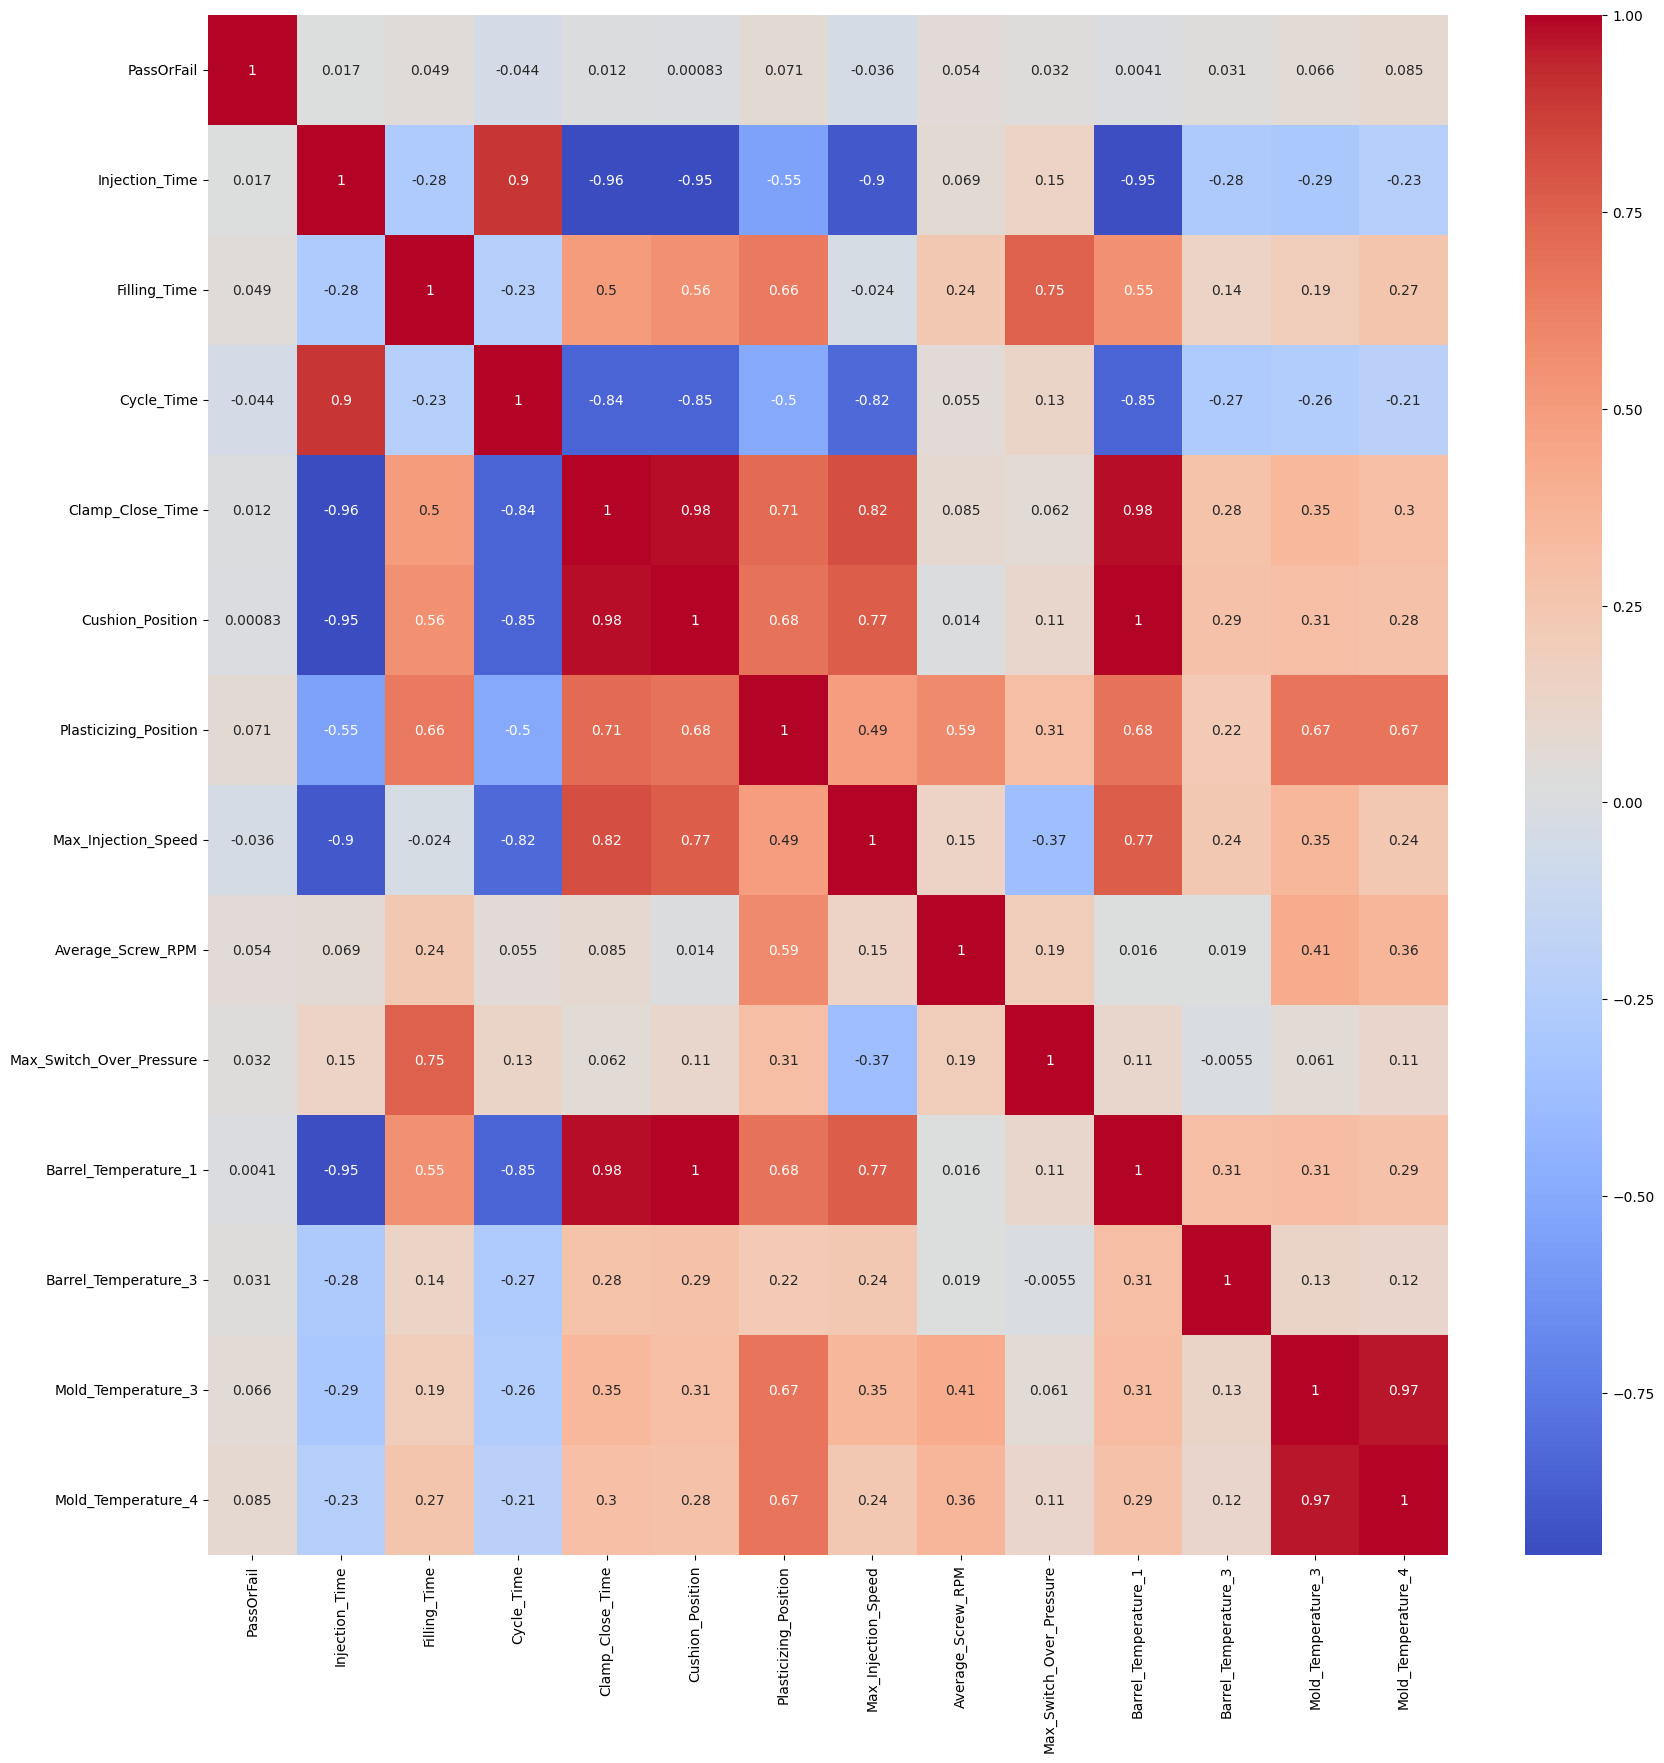

In [17]:
plt.figure(figsize=(20, 20))
sns.heatmap(cn7_removed.corr(), annot=True, cmap='coolwarm')
plt.show()


In [19]:
cn7_removed.columns
["Injection_Time", "Cycle_Time", "Clamp_Close_Time", "Cushion_Position", "Max_Injection_Speed", "Barrel_Temperature_1"]

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Plasticizing_Position',
       'Max_Injection_Speed', 'Average_Screw_RPM', 'Max_Switch_Over_Pressure',
       'Barrel_Temperature_1', 'Barrel_Temperature_3', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [18]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# VIF 계산을 위한 함수 정의
def calculate_vif(data):
    vif = pd.DataFrame()
    vif["Variable"] = data.columns
    vif["VIF"] = [calculate_single_vif(data, i) for i in range(data.shape[1])]
    return vif

# 각 변수에 대해 VIF 계산
def calculate_single_vif(data, i):
    # 독립변수(다른 변수들)와 회귀 모델을 적합
    x = data.drop(data.columns[i], axis=1)  # 해당 변수 이외의 변수들
    y = data.iloc[:, i]  # 해당 변수
    model = LinearRegression()
    model.fit(x, y)
    # R^2 값 계산
    r2 = model.score(x, y)
    # VIF 계산: 1 / (1 - R^2)
    return 1 / (1 - r2)

# 'PassOrFail'을 제외한 수치형 데이터 선택
numeric_columns = cn7_removed.select_dtypes(include=['float64', 'int32']).columns
numeric_columns = [col for col in numeric_columns if col != 'PassOrFail']  # 'PassOrFail' 제외

# VIF 데이터 선택
vif_data = cn7_removed[numeric_columns]

# VIF 계산
vif_result = calculate_vif(vif_data)

# VIF 결과 출력
vif_result.sort_values(by="VIF", ascending=False)


,Variable,VIF
4,Cushion_Position,979.307663
0,Injection_Time,699.338260
9,Barrel_Temperature_1,131.450919
1,Filling_Time,93.348974
3,Clamp_Close_Time,65.130145
6,Max_Injection_Speed,54.992825
12,Mold_Temperature_4,28.058691
11,Mold_Temperature_3,26.863450
5,Plasticizing_Position,15.288859
7,Average_Screw_RPM,8.220473


In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_test_with_target = X_test.copy()
X_test_with_target["PassOrFail"] = y_test
X_test_with_target.to_csv("./cn7_test.csv", index=False)

# X_train, y_train 합치기
Xy_train = X_train.copy()
Xy_train["PassOrFail"] = y_train

# Average_Screw_RPM 기준으로 up만 추출하기
Xy_train = Xy_train[Xy_train["Average_Screw_RPM"] > 250]

# X_train, y_train 분리
X_train = Xy_train.drop(columns=["PassOrFail"])
y_train = Xy_train["PassOrFail"]

# 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_resampled_with_target = X_resampled.copy()
X_resampled_with_target["PassOrFail"] = y_resampled
X_resampled_with_target.to_csv("./cn7_resampled.csv", index=False)


In [58]:
re = pd.read_csv("./cn7_resampled.csv")

In [59]:
re = pd.read_csv("./cn7_resampled.csv")
re.info()
re["PassOrFail"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3364 entries, 0 to 3363
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Injection_Time            3364 non-null   float64
 1   Filling_Time              3364 non-null   float64
 2   Plasticizing_Time         3364 non-null   float64
 3   Cycle_Time                3364 non-null   float64
 4   Clamp_Close_Time          3364 non-null   float64
 5   Cushion_Position          3364 non-null   float64
 6   Plasticizing_Position     3364 non-null   float64
 7   Clamp_Open_Position       3364 non-null   float64
 8   Max_Injection_Speed       3364 non-null   float64
 9   Max_Screw_RPM             3364 non-null   float64
 10  Average_Screw_RPM         3364 non-null   float64
 11  Max_Injection_Pressure    3364 non-null   float64
 12  Max_Switch_Over_Pressure  3364 non-null   float64
 13  Max_Back_Pressure         3364 non-null   float64
 14  Average_

PassOrFail
0    1682
1    1682
Name: count, dtype: int64

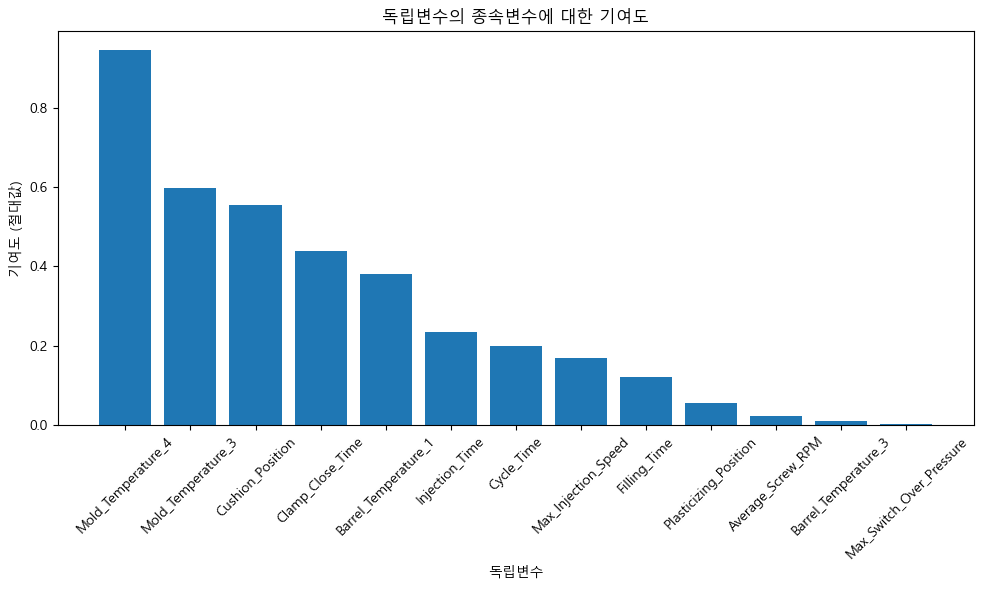

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
# 1. 데이터 로드 및 전처리
data = cn7_removed
y = data["PassOrFail"]
X = data.drop(columns=["PassOrFail"])

# 데이터 증강
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 스케일링 (표준화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. 회귀 모델 학습
model = LinearRegression()
model.fit(X_scaled, y)

# 3. 독립변수 기여도 계산 (회귀 계수의 절대값 기준)
coefficients = model.coef_
feature_names = X.columns  # 컬럼명 가져오기

# 기여도 계산 및 정렬
importance = np.abs(coefficients)
sorted_idx = np.argsort(importance)[::-1]

# 4. 기여도 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), importance[sorted_idx], tick_label=np.array(feature_names)[sorted_idx])
plt.title('독립변수의 종속변수에 대한 기여도')
plt.xlabel('독립변수')
plt.ylabel('기여도 (절대값)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
X = cn7_removed.drop(columns=["PassOrFail"])
y = cn7_removed["PassOrFail"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from imblearn.over_sampling import SMOTE
# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_train, X_val, y_train, y_val = train_test_split(X_resampled,y_resampled, test_size=0.3, random_state=42)
# 결과 확인
print("원본 데이터 분포:\n", y_train.value_counts())
print("SMOTE 적용 후 데이터 분포:\n", pd.Series(y_resampled).value_counts())

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_resampled)
X_train_scaled = ss.transform(X_resampled)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)